**Importing Data**


In [0]:
import os
import pandas as pd

In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "mohamedkacem" 
os.environ['KAGGLE_KEY'] = "d5db5cb95c6cadfdf48d7a44c50a06f5" 

In [8]:
!pwd

/content


In [9]:
!kaggle competitions download -c ashrae-energy-prediction


  0% 0.00/1.27M [00:00<?, ?B/s]
100% 1.27M/1.27M [00:00<00:00, 41.7MB/s]
  0% 0.00/2.53M [00:00<?, ?B/s]
100% 2.53M/2.53M [00:00<00:00, 167MB/s]
  0% 0.00/44.5k [00:00<?, ?B/s]
100% 44.5k/44.5k [00:00<00:00, 36.7MB/s]
 94% 112M/120M [00:00<00:00, 115MB/s]  
100% 120M/120M [00:00<00:00, 130MB/s]
 92% 153M/167M [00:01<00:00, 70.6MB/s]
100% 167M/167M [00:01<00:00, 98.8MB/s]
 93% 82.0M/88.4M [00:00<00:00, 109MB/s]
100% 88.4M/88.4M [00:00<00:00, 114MB/s]


In [10]:
#unzip dataset

!unzip  /content/test.csv.zip
!unzip  /content/train.csv.zip
!unzip  /content/weather_test.csv.zip
!unzip  /content/weather_train.csv.zip


Archive:  /content/test.csv.zip
  inflating: test.csv                
Archive:  /content/train.csv.zip
  inflating: train.csv               
Archive:  /content/weather_test.csv.zip
  inflating: weather_test.csv        
Archive:  /content/weather_train.csv.zip
  inflating: weather_train.csv       


In [11]:
!unzip /content/sample_submission.csv.zip

Archive:  /content/sample_submission.csv.zip
  inflating: sample_submission.csv   


In [0]:
train = pd.read_csv("/content/train.csv",parse_dates=['timestamp'])
test = pd.read_csv("/content/test.csv",parse_dates=['timestamp'])
# sample_sub = pd.read_csv("/content/sample_submission.csv")
weather_test = pd.read_csv("/content/weather_test.csv",parse_dates=['timestamp'])
weather_train = pd.read_csv("/content/weather_train.csv",parse_dates=['timestamp'])
building_metadata = pd.read_csv('/content/building_metadata.csv')

In [13]:
building_metadata.isnull().sum()

site_id           0
building_id       0
primary_use       0
square_feet       0
year_built      774
floor_count    1094
dtype: int64

In [14]:
building_metadata.describe()

,site_id,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,1449.000000,675.000000,355.000000
mean,6.952381,724.000000,92111.776398,1967.957037,3.740845
std,5.003432,418.434583,110769.950997,31.054030,3.333683
min,0.000000,0.000000,283.000000,1900.000000,1.000000
25%,3.000000,362.000000,23012.000000,1949.000000,1.000000
50%,5.000000,724.000000,57673.000000,1970.000000,3.000000
75%,13.000000,1086.000000,115676.000000,1995.000000,5.000000
max,15.000000,1448.000000,875000.000000,2017.000000,26.000000


filling the messing data in building_metadata

In [0]:
building_metadata['year_built'].fillna(1976, inplace=True)
building_metadata['floor_count'].fillna(3.7, inplace=True)

In [16]:
building_metadata.isnull().sum()

site_id        0
building_id    0
primary_use    0
square_feet    0
year_built     0
floor_count    0
dtype: int64

In [17]:
weather_train.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


**Data Visualiasation**

In [18]:
weather_train.describe()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,139773.000000,139718.000000,70600.000000,139660.000000,89484.000000,129155.000000,133505.000000,139469.000000
mean,7.478977,14.418106,2.149306,7.350158,0.983047,1016.158038,180.526632,3.560527
std,4.604744,10.626595,2.599150,9.790235,8.463678,7.629684,111.523629,2.335874
min,0.000000,-28.900000,0.000000,-35.000000,-1.000000,968.200000,0.000000,0.000000
25%,3.000000,7.200000,0.000000,0.600000,0.000000,1011.800000,80.000000,2.100000
50%,7.000000,15.000000,2.000000,8.300000,0.000000,1016.400000,190.000000,3.100000
75%,11.000000,22.200000,4.000000,14.400000,0.000000,1020.800000,280.000000,5.000000
max,15.000000,47.200000,9.000000,26.100000,343.000000,1045.500000,360.000000,19.000000


* min value of wind_speed as 0 does not make any sense.



In [19]:
weather_train.isnull().sum()

site_id                   0
timestamp                 0
air_temperature          55
cloud_coverage        69173
dew_temperature         113
precip_depth_1_hr     50289
sea_level_pressure    10618
wind_direction         6268
wind_speed              304
dtype: int64

* missing data especially in precip_depth_1_hr,

1.   Élément de liste
2.   Élément de liste

sea_level_pressure ,cloud coverage 

In [0]:
train_df = train.copy()
test_df = test.copy()
weather_train_df = weather_train.copy()
weather_test_df = weather_test.copy()

In [0]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [22]:
weather_train.columns

Index(['site_id', 'timestamp', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed'],
      dtype='object')

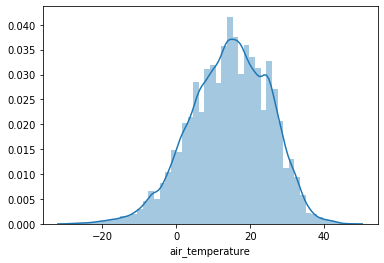

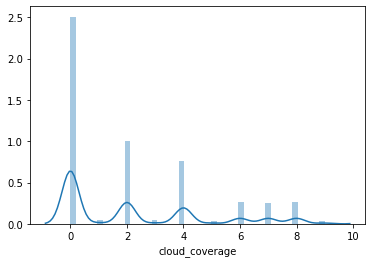

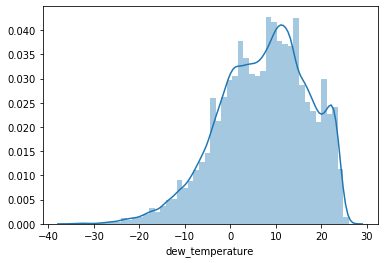

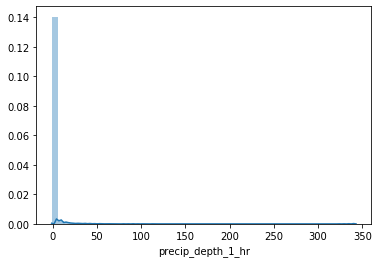

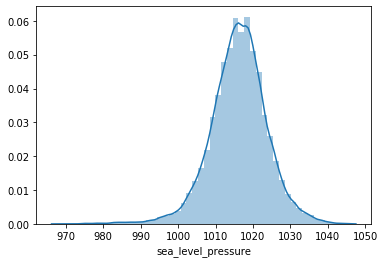

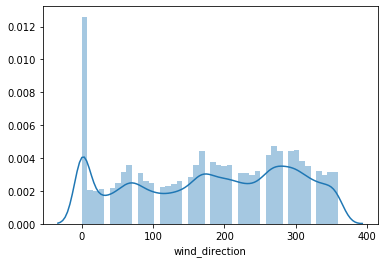

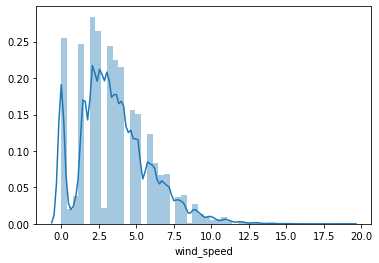

In [23]:
weather_cols = ['air_temperature','cloud_coverage','dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed']
for ind,col in enumerate(weather_train_df[weather_cols]):
    plt.figure(ind)
    sns.distplot(weather_train_df[col].dropna())  

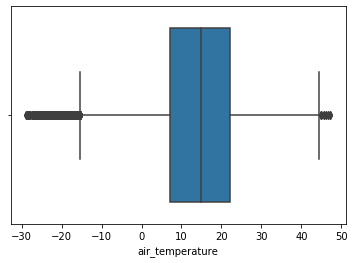

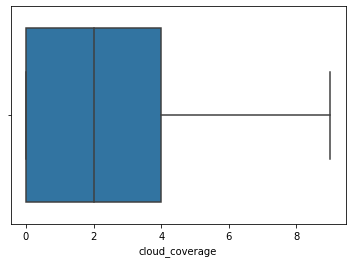

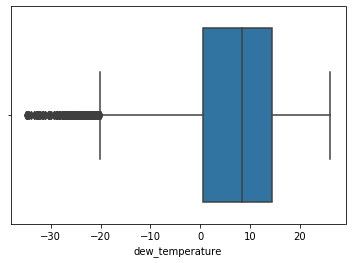

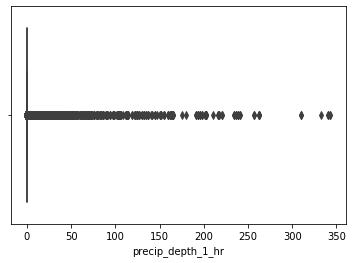

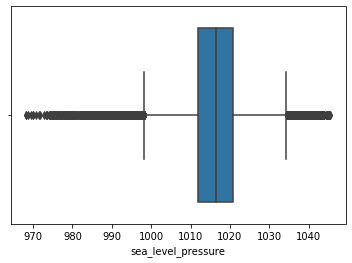

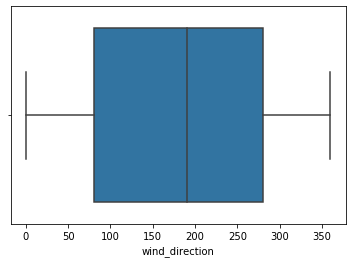

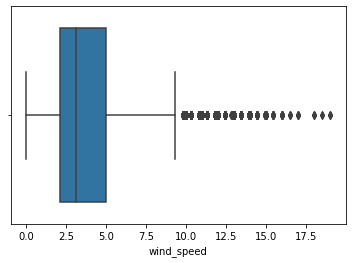

In [24]:
for ind,col in enumerate(weather_train_df[weather_cols]):
    plt.figure(ind)
    sns.boxplot(weather_train_df[col].dropna())

* we can use air temprature feature ,a usefull feature without any outliers
* sea_level_pressure is a usefull feature 
* many 0 values in precip_depth_1_hr 

In [25]:
weather_train_df.shape



(139773, 9)

In [26]:
train_df 

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,1,0,2016-01-01 00:00:00,0.000
2,2,0,2016-01-01 00:00:00,0.000
3,3,0,2016-01-01 00:00:00,0.000
4,4,0,2016-01-01 00:00:00,0.000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575


In [27]:
train_df.shape

(20216100, 4)

* I notice that there is too many value so we have to replace them with the mean or NAN

In [28]:
train_df.describe()

,building_id,meter,meter_reading
count,2.021610e+07,2.021610e+07,2.021610e+07
mean,7.992780e+02,6.624412e-01,2.117121e+03
std,4.269133e+02,9.309921e-01,1.532356e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.930000e+02,0.000000e+00,1.830000e+01
50%,8.950000e+02,0.000000e+00,7.877500e+01
75%,1.179000e+03,1.000000e+00,2.679840e+02
max,1.448000e+03,3.000000e+00,2.190470e+07


In [29]:
train_df.isnull().sum()

building_id      0
meter            0
timestamp        0
meter_reading    0
dtype: int64

* There is no missing value in train_df

Data Preparation


In [0]:
def fill_weather_dataset(weather_df):
    
    # Find Missing Dates
    time_format = "%Y-%m-%d %H:%M:%S"

    # Add new Features
    weather_df["datetime"] = pd.to_datetime(weather_df["timestamp"])
    weather_df["day"] = weather_df["datetime"].dt.day
    weather_df["week"] = weather_df["datetime"].dt.week
    weather_df["month"] = weather_df["datetime"].dt.month
    
    # Reset Index for Fast Update
    weather_df = weather_df.set_index(['site_id','day','month'])

    air_temperature_filler = pd.DataFrame(weather_df.groupby(['site_id','day','month'])['air_temperature'].mean(),columns=["air_temperature"])
    weather_df.update(air_temperature_filler,overwrite=False)

    # Step 1
    cloud_coverage_filler = weather_df.groupby(['site_id','day','month'])['cloud_coverage'].mean()
    # Step 2
    cloud_coverage_filler = pd.DataFrame(cloud_coverage_filler.fillna(method='ffill'),columns=["cloud_coverage"])


    weather_df.update(cloud_coverage_filler,overwrite=False)

    due_temperature_filler = pd.DataFrame(weather_df.groupby(['site_id','day','month'])['dew_temperature'].mean(),columns=["dew_temperature"])
    weather_df.update(due_temperature_filler,overwrite=False)

    # Step 1
    sea_level_filler = weather_df.groupby(['site_id','day','month'])['sea_level_pressure'].mean()
    # Step 2
    sea_level_filler = pd.DataFrame(sea_level_filler.fillna(method='ffill'),columns=['sea_level_pressure'])

    weather_df.update(sea_level_filler,overwrite=False)

    wind_direction_filler =  pd.DataFrame(weather_df.groupby(['site_id','day','month'])['wind_direction'].mean(),columns=['wind_direction'])
    weather_df.update(wind_direction_filler,overwrite=False)

    wind_speed_filler =  pd.DataFrame(weather_df.groupby(['site_id','day','month'])['wind_speed'].mean(),columns=['wind_speed'])
    weather_df.update(wind_speed_filler,overwrite=False)

    # Step 1
    precip_depth_filler = weather_df.groupby(['site_id','day','month'])['precip_depth_1_hr'].mean()

    # Step 2
    precip_depth_filler = pd.DataFrame(precip_depth_filler.fillna(method='ffill'),columns=['precip_depth_1_hr'])

    weather_df.update(precip_depth_filler,overwrite=False)

    weather_df = weather_df.reset_index()
    weather_df = weather_df.drop(['datetime','day','week','month'],axis=1)
    return weather_df

In [0]:
weather_train_df = fill_weather_dataset(weather_train_df)
weather_test_df = fill_weather_dataset(weather_test_df)


In [32]:
weather_train_df.isnull().sum()

site_id               0
timestamp             0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64

**Merging Data** 

In [0]:
train = pd.merge(train,building_metadata,on='building_id',how='left')
test  = pd.merge(test,building_metadata,on='building_id',how='left')

In [0]:
train = pd.merge(train,weather_train,on=['site_id','timestamp'],how='left')
test  = pd.merge(test,weather_test,on=['site_id','timestamp'],how='left')

In [35]:
import gc
del weather_train, weather_test, building_metadata, train_df, weather_train_df, weather_test_df
gc.collect()

0

In [0]:
train['month'] = train['timestamp'].dt.month
train['day'] = train['timestamp'].dt.month
train['year'] = train['timestamp'].dt.month
train['hour'] = train['timestamp'].dt.month

test['month'] = test['timestamp'].dt.month
test['day'] = test['timestamp'].dt.month
test['year'] = test['timestamp'].dt.month
test['hour'] = test['timestamp'].dt.month


In [0]:
train.drop(['timestamp'],axis=1,inplace=True)
test.drop(['timestamp'],axis=1,inplace=True)

In [0]:
test.drop(['row_id'],axis=1,inplace=True)

In [38]:
train.isnull().sum()

building_id                 0
meter                       0
meter_reading               0
site_id                     0
primary_use                 0
square_feet                 0
year_built                  0
floor_count                 0
air_temperature         96658
cloud_coverage        8825365
dew_temperature        100140
precip_depth_1_hr     3749023
sea_level_pressure    1231669
wind_direction        1449048
wind_speed             143676
month                       0
day                         0
year                        0
hour                        0
dtype: int64

In [39]:
test.isnull().sum()

row_id                       0
building_id                  0
meter                        0
site_id                      0
primary_use                  0
square_feet                  0
year_built                   0
floor_count                  0
air_temperature         221901
cloud_coverage        19542180
dew_temperature         260799
precip_depth_1_hr      7801563
sea_level_pressure     2516826
wind_direction         2978663
wind_speed              302089
month                        0
day                          0
year                         0
hour                         0
dtype: int64

**FILLING THE MISSING VALUES**

In [0]:
train['air_temperature'].fillna(train['air_temperature'].mean(), inplace=True)
train['dew_temperature'].fillna(train['dew_temperature'].mean(), inplace=True)
train['wind_speed'].fillna(train['wind_speed'].mean(), inplace=True)
train['precip_depth_1_hr'].fillna(method='bfill', inplace=True)
train['wind_direction'].fillna(method='ffill', inplace=True)
train['sea_level_pressure'].fillna(method='ffill', inplace=True)
train['cloud_coverage'].fillna(1.9, inplace=True)

test['air_temperature'].fillna(test['air_temperature'].mean(), inplace=True)
test['dew_temperature'].fillna(test['dew_temperature'].mean(), inplace=True)
test['wind_speed'].fillna(test['wind_speed'].mean(), inplace=True)
test['precip_depth_1_hr'].fillna(method='bfill', inplace=True)
test['wind_direction'].fillna(method='ffill', inplace=True)
test['sea_level_pressure'].fillna(method='ffill', inplace=True)
test['cloud_coverage'].fillna(1.9, inplace=True)

In [0]:
d_types = {'building_id': np.int16,
          'meter': np.int8,
          'site_id': np.int8,
          'primary_use': 'category',
          'square_feet': np.int32,
          'year_built': np.float16,
          'floor_count': np.float16,
          'air_temperature': np.float32,
          'cloud_coverage': np.float16,
          'dew_temperature': np.float32,
          'precip_depth_1_hr': np.float16,
          'sea_level_pressure': np.float32,
          'wind_direction': np.float16,
          'wind_speed': np.float32}

for feature in d_types:
    train[feature] = train[feature].astype(d_types[feature])
    test[feature] = test[feature].astype(d_types[feature])

In [0]:
train['meter_reading'] = np.log1p(train['meter_reading'])

In [43]:
train.shape

(20216100, 19)

In [44]:
train.isnull().sum()

building_id           0
meter                 0
meter_reading         0
site_id               0
primary_use           0
square_feet           0
year_built            0
floor_count           0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
month                 0
day                   0
year                  0
hour                  0
dtype: int64

In [45]:
train['cloud_coverage'].describe()

count    2.021610e+07
mean              NaN
std      0.000000e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.900391e+00
75%      2.000000e+00
max      9.000000e+00
Name: cloud_coverage, dtype: float64

In [46]:
train.isnull().sum()

building_id           0
meter                 0
meter_reading         0
site_id               0
primary_use           0
square_feet           0
year_built            0
floor_count           0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
month                 0
day                   0
year                  0
hour                  0
dtype: int64

In [47]:
train.head(10)

,building_id,meter,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month,day,year,hour
0,0,0,0.0,0,Education,7432,2008.0,3.699219,25.0,6.0,20.0,-1.0,1019.700012,0.0,0.0,1,1,1,1
1,1,0,0.0,0,Education,2720,2004.0,3.699219,25.0,6.0,20.0,-1.0,1019.700012,0.0,0.0,1,1,1,1
2,2,0,0.0,0,Education,5376,1991.0,3.699219,25.0,6.0,20.0,-1.0,1019.700012,0.0,0.0,1,1,1,1
3,3,0,0.0,0,Education,23685,2002.0,3.699219,25.0,6.0,20.0,-1.0,1019.700012,0.0,0.0,1,1,1,1
4,4,0,0.0,0,Education,116607,1975.0,3.699219,25.0,6.0,20.0,-1.0,1019.700012,0.0,0.0,1,1,1,1
5,5,0,0.0,0,Education,8000,2000.0,3.699219,25.0,6.0,20.0,-1.0,1019.700012,0.0,0.0,1,1,1,1
6,6,0,0.0,0,Lodging/residential,27926,1981.0,3.699219,25.0,6.0,20.0,-1.0,1019.700012,0.0,0.0,1,1,1,1
7,7,0,0.0,0,Education,121074,1989.0,3.699219,25.0,6.0,20.0,-1.0,1019.700012,0.0,0.0,1,1,1,1
8,8,0,0.0,0,Education,60809,2003.0,3.699219,25.0,6.0,20.0,-1.0,1019.700012,0.0,0.0,1,1,1,1
9,9,0,0.0,0,Office,27000,2010.0,3.699219,25.0,6.0,20.0,-1.0,1019.700012,0.0,0.0,1,1,1,1


In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()
train['meter']= le.fit_transform(train['meter']).astype("uint8")
test['meter']= le.fit_transform(test['meter']).astype("uint8")

train['primary_use']= le.fit_transform(train['primary_use']).astype("uint8")
test['primary_use']= le.fit_transform(test['primary_use']).astype("uint8")

In [0]:
y = train['meter_reading']

In [51]:
train.drop(['meter_reading'],axis=1,inplace=True)


train.columns

Index(['building_id', 'meter', 'site_id', 'primary_use', 'square_feet',
       'year_built', 'floor_count', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed', 'month', 'day', 'year', 'hour'],
      dtype='object')

In [0]:
X = train

In [53]:
train.head(10)

,building_id,meter,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month,day,year,hour
0,0,0,0,0,7432,2008.0,3.699219,25.0,6.0,20.0,-1.0,1019.700012,0.0,0.0,1,1,1,1
1,1,0,0,0,2720,2004.0,3.699219,25.0,6.0,20.0,-1.0,1019.700012,0.0,0.0,1,1,1,1
2,2,0,0,0,5376,1991.0,3.699219,25.0,6.0,20.0,-1.0,1019.700012,0.0,0.0,1,1,1,1
3,3,0,0,0,23685,2002.0,3.699219,25.0,6.0,20.0,-1.0,1019.700012,0.0,0.0,1,1,1,1
4,4,0,0,0,116607,1975.0,3.699219,25.0,6.0,20.0,-1.0,1019.700012,0.0,0.0,1,1,1,1
5,5,0,0,0,8000,2000.0,3.699219,25.0,6.0,20.0,-1.0,1019.700012,0.0,0.0,1,1,1,1
6,6,0,0,4,27926,1981.0,3.699219,25.0,6.0,20.0,-1.0,1019.700012,0.0,0.0,1,1,1,1
7,7,0,0,0,121074,1989.0,3.699219,25.0,6.0,20.0,-1.0,1019.700012,0.0,0.0,1,1,1,1
8,8,0,0,0,60809,2003.0,3.699219,25.0,6.0,20.0,-1.0,1019.700012,0.0,0.0,1,1,1,1
9,9,0,0,6,27000,2010.0,3.699219,25.0,6.0,20.0,-1.0,1019.700012,0.0,0.0,1,1,1,1


Creating and Training  models

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import Sequential
from tensorflow.keras import backend as K

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_test.shape, X_train.shape, y_test.shape, y_train.shape)

(5054025, 18) (15162075, 18) (5054025,) (15162075,)


USING LSTM MODEL

In [0]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Activation

In [57]:
X_train.shape

(15162075, 18)

In [0]:
#X_train = X_train.to_numpy()
#X_train = X_train.reshape(15162075,1,13)


In [0]:
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=0))

In [59]:


  
'''
model = Sequential()
model.add(LSTM(256,input_shape=(1, 13),return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.05), )
model.add(LSTM(128,activation='relu',return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.05), )

model.add(LSTM(1,activation='relu',return_sequences=False))
model.add(BatchNormalization())




model.compile(loss='mse',optimizer =opt,metrics=[root_mean_squared_error])


model.fit(X_train,y_train,epochs=32,batch_size=8192);
'''



"\nmodel = Sequential()\nmodel.add(LSTM(256,input_shape=(1, 13),return_sequences=True))\nmodel.add(BatchNormalization())\nmodel.add(Dropout(0.05), )\nmodel.add(LSTM(128,activation='relu',return_sequences=True))\nmodel.add(BatchNormalization())\nmodel.add(Dropout(0.05), )\n\nmodel.add(LSTM(1,activation='relu',return_sequences=False))\nmodel.add(BatchNormalization())\n\n\n\n\nmodel.compile(loss='mse',optimizer =opt,metrics=[root_mean_squared_error])\n\n\nmodel.fit(X_train,y_train,epochs=32,batch_size=8192);\n"

When i used the LSTM model ,it gives me a loss equal to 4.46 so i choose to try a simple model with 4 layers 

USING A SIMPLE NN MODEL

In [60]:
model = Sequential()
#layer with 256 neurons
model.add(Dense(256, activation='relu', input_shape=(18,))) 
model.add(BatchNormalization())
model.add(Dropout(0.1), )
#layer with 128 neurons
model.add(Dense(128, activation='relu'))
#layer with 64 neurons
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1), )
model.add(Dense(1, activation='relu'))
opt =Adam(0.001)
model.compile(loss='mse', optimizer=opt, metrics=[root_mean_squared_error])
model.fit(X_train,y_train,epochs=30,batch_size=2048, validation_data=(X_test, y_test));



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 15162075 samples, validate on 5054025 samples
Epoch 1/30
15162075/15162075 [==============================] - 73s 5us/sample - loss: 3.5190 - root_mean_squared_error: 1.8716 - val_loss: 3.6706 - val_root_mean_squared_error: 1.9155
Epoch 2/30
15162075/15162075 [==============================] - 58s 4us/sample - loss: 3.0158 - root_mean_squared_error: 1.7356 - val_loss: 3.1494 - val_root_mean_squared_error: 1.7742
Epoch 3/30
15162075/15162075 [==============================] - 58s 4us/sample - loss: 2.5382 - root_mean_squared_error: 1.5918 - val_loss: 2.6283 - val_root_mean_squared_error: 1.6207
Epoch 4/30
15162075/15162075 [==============================] - 59s 4us/sample - loss: 2.3220 - root_mean_squared_error: 1.5228 - val_loss: 2.2454 - val_root_mean_squared_error: 1.4980
Epoch 5/30
15162075/15162075 [==============================] - 58s 4us/sample - loss: 2.2135 - root_mean_squared_error: 1.4

In [62]:
train.columns

Index(['building_id', 'meter', 'site_id', 'primary_use', 'square_feet',
       'year_built', 'floor_count', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed', 'month', 'day', 'year', 'hour'],
      dtype='object')

In [63]:
test.columns

Index(['row_id', 'building_id', 'meter', 'site_id', 'primary_use',
       'square_feet', 'year_built', 'floor_count', 'air_temperature',
       'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr',
       'sea_level_pressure', 'wind_direction', 'wind_speed', 'month', 'day',
       'year', 'hour'],
      dtype='object')

In [65]:
y_pred = model.predict(test, batch_size=1024, verbose=1)

41697600/41697600 [==============================] - 64s 2us/sample


In [0]:
sample_sub = pd.read_csv("/content/sample_submission.csv")

In [0]:
export_csv = sample_sub.to_csv('./my-submission.csv', index=False)

In [68]:
!kaggle competitions submit ashrae-energy-prediction -f my-submission.csv -m 'Final submission'

100% 427M/427M [00:09<00:00, 45.9MB/s]
Successfully submitted to ASHRAE - Great Energy Predictor III